<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

### Load the data

In [1]:
%pwd

'C:\\Users\\thedo\\lambda_u4\\DS-Unit-4-Sprint-1-NLP\\module4-topic-modeling'

In [2]:
import pandas as pd
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.shape

(28332, 24)

In [3]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [4]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [370]:
electronics = df[df['primaryCategories'] == 'Electronics'].copy()
electronics.shape

(13995, 24)

### Get tokens

In [6]:
# define tokenize function
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [8]:
review_tokens = electronics['reviews.text'].apply(tokenize)
review_tokens[:5]

8343    [great, case, place, husband, love, holds, lot...
8344    [discarding, getting, rid, broken, cd, cases, ...
8345                        [dollars, boycotting, amazon]
8346    [initial, impression, good, material, nicer, s...
8347    [pros, standard, echo, cons, older, generation...
Name: reviews.text, dtype: object

### Create the id2word dictionary

https://radimrehurek.com/gensim/corpora/dictionary.html

In [64]:
from gensim import corpora

id2word = corpora.Dictionary(review_tokens)

In [11]:
# number of documents processed (should equal the number of electronics reviews)
id2word.num_docs

13995

In [12]:
# number of total words in all documents
id2word.num_pos

186194

In [13]:
# number of unique words
len(id2word)

# same thing
#len(id2word.keys())

7012

In [15]:
# id of a particular word
id2word.token2id['tablet']

759

In [16]:
# number of times that word appears in all documents (collection frequency)
id2word.cfs[759]

5908

In [17]:
# number of documents that contain that word (document frequency)
id2word.dfs[759]

4622

In [66]:
# filter outliers, most and least common words

# library defaults:
# no_below=5    removes any words appearing in less than 5 documents (this filters WAY more words than no_above does)
# no_above=.5   removes any words appearing in more than 50% of documents 

# note: filtering the top 5% of documents ignores all words appearing in more than 700 documents.  (.05 * 13995 = 699.75) 

id2word = corpora.Dictionary(review_tokens) # running this again here so the cell can be re-ran on its own
print("Number of words before filtering:", len(id2word))
id2word.filter_extremes(no_below=5, no_above=0.95)
print("Number of words after filtering:", len(id2word))

Number of words before filtering: 7012
Number of words after filtering: 2613


### Run LDA once

https://radimrehurek.com/gensim/models/ldamulticore.html

In [41]:
# create a bag of words representation of our corpus
corpus = [id2word.doc2bow(text) for text in review_tokens]

In [42]:
# tokens in the first review (after the filter_extremes method)
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [43]:
# actually run LDA
from gensim.models.ldamulticore import LdaMulticore
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics = 10,
                   passes=10,
                   workers=5  # documentation recommends number of real cores minus 1
                  )

In [44]:
# simple print_topics
lda.print_topics()

[(0,
  '0.040*"tablet" + 0.025*"great" + 0.024*"best" + 0.021*"buy" + 0.020*"battery" + 0.017*"good" + 0.016*"little" + 0.014*"screen" + 0.014*"life" + 0.013*"nice"'),
 (1,
  '0.071*"kindle" + 0.020*"read" + 0.018*"books" + 0.016*"better" + 0.016*"new" + 0.016*"reading" + 0.016*"screen" + 0.014*"love" + 0.014*"like" + 0.014*"bought"'),
 (2,
  '0.028*"tablet" + 0.018*"bought" + 0.016*"price" + 0.014*"ipad" + 0.014*"card" + 0.014*"pretty" + 0.012*"buy" + 0.012*"keyboard" + 0.012*"needs" + 0.011*"gb"'),
 (3,
  '0.023*"great" + 0.018*"amazon" + 0.017*"screen" + 0.016*"alexa" + 0.016*"like" + 0.015*"sound" + 0.014*"love" + 0.014*"device" + 0.013*"size" + 0.012*"tap"'),
 (4,
  '0.033*"product" + 0.024*"great" + 0.023*"tablet" + 0.019*"good" + 0.018*"buy" + 0.015*"charging" + 0.014*"charge" + 0.012*"time" + 0.010*"best" + 0.009*"purchased"'),
 (5,
  '0.078*"easy" + 0.065*"great" + 0.061*"use" + 0.043*"tablet" + 0.026*"old" + 0.025*"loves" + 0.023*"love" + 0.019*"bought" + 0.019*"recommend" + 

In [45]:
# using regular expressions to clean that up
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet great best buy battery

------ Topic 1 ------
kindle read books better new

------ Topic 2 ------
tablet bought price ipad card

------ Topic 3 ------
great amazon screen alexa like

------ Topic 4 ------
product great tablet good buy

------ Topic 5 ------
easy great use tablet old

------ Topic 6 ------
great tablet price love books

------ Topic 7 ------
tablet kids games apps use

------ Topic 8 ------
loves bought gift old christmas

------ Topic 9 ------
tablet amazon good price apps



In [46]:
# fancy visualizer
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [47]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.129832  0.007440       1        1  14.874755
7      0.069423 -0.039917       2        1  13.575792
1     -0.055651 -0.038837       3        1  12.670988
6     -0.019591 -0.123401       4        1  10.868231
3     -0.155420 -0.100906       5        1  10.552825
5      0.155709 -0.075323       6        1   9.518544
8      0.254178  0.041570       7        1   9.082863
0     -0.020491  0.035552       8        1   7.519159
4     -0.044769  0.125432       9        1   6.056515
2     -0.053557  0.168388      10        1   5.280324, topic_info=        Term         Freq        Total Category  logprob  loglift
792    loves  1804.000000  1804.000000  Default  30.0000  30.0000
61      easy  2149.000000  2149.000000  Default  29.0000  29.0000
760   kindle  2352.000000  2352.000000  Default  28.0000  28.0000
1      great  4863.000000  4863.000000  Default  27.0000  27.0000
688     gift   813.000000   813.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
90   product    61.640450  1134.130859  Topic10  -5.0248   0.0289
105     year    61.956802  1370.045776  Topic10  -5.0197  -0.1550
149   device    54.095901   793.163269  Topic10  -5.1554   0.2559
192     best    53.500286   901.346863  Topic10  -5.1665   0.1170
118      got    52.388134   843.394531  Topic10  -5.1875   0.1624

[776 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2521      2  0.946401         abc
881       1  0.018091  absolutely
881       3  0.031660  absolutely
881       4  0.004523  absolutely
881       5  0.031660  absolutely
...     ...       ...         ...
1182      4  0.028108          yr
1182      6  0.709724          yr
1182      8  0.010540          yr
1182      9  0.021081          yr
450      10  0.783960     zippers

[2413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 2, 7, 4, 6, 9, 1, 5, 3])

### Selecting number of topics

Runs LDA multiple times

In [67]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=5)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [68]:
%%time
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus,
                                            start=2, 
                                            limit=20, 
                                            step=1,
                                            passes=10)

Wall time: 15min


In [69]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-2.219304
1,0,3,-2.272762
2,0,4,-2.268592
3,0,5,-2.269893
4,0,6,-2.296123


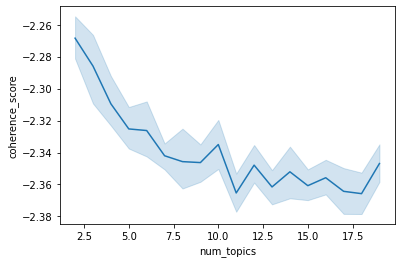

In [70]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [71]:
# Print the average coherence scores for each num_topics
topic_coherence.groupby('num_topics').mean()

,pass,coherence_score
num_topics,,
2,4.5,-2.268397
3,4.5,-2.285859
4,4.5,-2.309502
5,4.5,-2.325238
6,4.5,-2.326244
7,4.5,-2.342035
8,4.5,-2.345717
9,4.5,-2.346309
10,4.5,-2.334997


### Run LDA once again with the chosen number of topics

All of the coherence scores are between 2.26 and 2.36, I'm not sure how much variation that actually is.

I'm going to run it with 5 topics so I have a bit of variation in later analysis.

In [73]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics = 5,
                   passes=50,
                   workers=5)

In [121]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
loves tablet kids old year bought games love great use

------ Topic 1 ------
kindle books reading read love use screen new great bought

------ Topic 2 ------
tablet price great ipad amazon good best bought buy tablets

------ Topic 3 ------
amazon apps screen tablet great use like device google store

------ Topic 4 ------
great tablet good product use gift easy price recommend buy



In [75]:
# visualize it
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.231165  0.015855       1        1  22.747280
1     -0.031794 -0.157645       2        1  21.314375
3      0.121530 -0.132158       3        1  21.268126
2      0.157764  0.110218       4        1  18.018583
4     -0.016335  0.163730       5        1  16.651642, topic_info=          Term         Freq        Total Category  logprob  loglift
760     kindle  2343.000000  2343.000000  Default  30.0000  30.0000
792      loves  1631.000000  1631.000000  Default  29.0000  29.0000
90     product  1108.000000  1108.000000  Default  28.0000  28.0000
87       price  1973.000000  1973.000000  Default  27.0000  27.0000
105       year  1231.000000  1231.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
289       size   211.986862   796.912292   Topic5  -4.9381   0.4684
1049      kids   221.337616  1710.287231   Topic5  -4.8950  -0.2521
276    perfect   172.476852   824.828552   Topic5  -5.1444   0.2277
699   features   161.582962   483.143860   Topic5  -5.2096   0.6974
46      amazon   161.370377  2233.327148   Topic5  -5.2110  -0.8349

[353 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
180       1  0.279316    access
180       2  0.178979    access
180       3  0.515243    access
180       4  0.024406    access
1204      1  0.166602   account
...     ...       ...       ...
105       3  0.004871      year
528       1  0.979600        yo
2278      5  0.967951  youngest
1182      1  0.998300        yr
1562      4  0.974353       äôt

[598 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

### Analyzing/Explaining topics

By moving the lambda slider to zero in the above visualization, you can get the list of words sorted by how unique they are to that topic.  That makes it a bit easier to tell them apart, since the top words should all be unique.  Unfortunately I could not find anything in the LDA documentation about getting the list of words in that order, so I would have to redo those calculations myself to get that list programatically.

https://radimrehurek.com/gensim/models/ldamodel.html#gensim.models.ldamodel.LdaModel



### Check topic correlations

In [354]:
# Start with getting the distributions of each topic for each review (document)

# Method from the lecture notebook
distro = [lda[d] for d in corpus]
num_topics = 5

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

topics = pd.DataFrame.from_records(new_distro)
topics.head()

Wall time: 4 s


,0,1,2,3,4
0,0.026350,0.026193,0.467646,0.025337,0.454473
1,0.000000,0.064200,0.470137,0.457372,0.000000
2,0.066862,0.066957,0.730543,0.068498,0.067140
3,0.079138,0.099502,0.352791,0.419629,0.048940
4,0.015640,0.254875,0.257955,0.455809,0.015722


In [357]:
# Alternate method I found (differences are due to floating point errors)
lda.get_document_topics(corpus[1], minimum_probability=0)

[(0, 0.0041647297),
 (1, 0.06419974),
 (2, 0.47013763),
 (3, 0.45737216),
 (4, 0.004125764)]

In [355]:
topics = []
for doc in corpus:
    row = []
    for topic, prob in lda.get_document_topics(doc, minimum_probability=0):
        row.append(prob)
    topics.append(row)

topics = pd.DataFrame(topics)
topics.head()

,0,1,2,3,4
0,0.026359,0.026195,0.467685,0.025337,0.454425
1,0.004165,0.064221,0.470121,0.457368,0.004126
2,0.066862,0.066957,0.730520,0.068520,0.067140
3,0.079138,0.099508,0.352786,0.419624,0.048944
4,0.015640,0.254870,0.257930,0.455838,0.015722


In [351]:
# proving this avoids the issue of lda[] not returning 0 values
topics.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [373]:
topics.shape

(13995, 5)

In [87]:
electronics.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'primaryTopic'],
      dtype='object')

In [374]:
# reset index so that the topics dataframe matches the original reviews
electronics = electronics.reset_index()

In [375]:
# for each review, find the topic with the highest score
electronics['primaryTopic'] = topics.idxmax(axis=1)

In [376]:
electronics[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').describe()

reviews.rating                                             
                      count      mean       std  min  25%  50%  75%  max
primaryTopic                                                            
0                    4002.0  4.698151  0.578583  1.0  4.0  5.0  5.0  5.0
1                    2821.0  4.655796  0.682813  1.0  4.0  5.0  5.0  5.0
2                    2113.0  4.411737  0.874131  1.0  4.0  5.0  5.0  5.0
3                    2091.0  4.342898  0.897935  1.0  4.0  5.0  5.0  5.0
4                    2968.0  4.559973  0.753673  1.0  4.0  5.0  5.0  5.0

- Count: the number of documents having that primary topic
- Mean: the average review score for that primary topic

Remember though, most of the reviews are either 4 or 5 anyway.

In [377]:
electronics['reviews.rating'].value_counts()

5    9371
4    3703
3     551
1     187
2     183
Name: reviews.rating, dtype: int64

In [87]:
electronics.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'primaryTopic'],
      dtype='object')

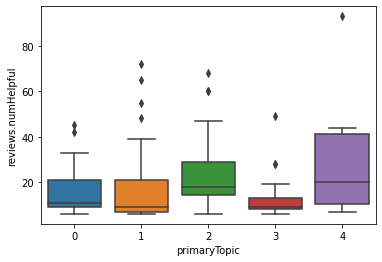

In [378]:
# Box plot of the number of helpful votes each topic gets 
# (filtered outliers and kept vote counts between 5 and 100)
sns.boxplot(x='primaryTopic', y='reviews.numHelpful', 
            data=electronics[(electronics['reviews.numHelpful'] > 5) & 
                             (electronics['reviews.numHelpful'] < 100)]
           );

In [380]:
electronics['primaryTopicStrength'] = topics.max(axis=1)
electronics[['primaryTopic', 'primaryTopicStrength']].head()

,primaryTopic,primaryTopicStrength
0,2,0.467685
1,2,0.470121
2,2,0.730520
3,3,0.419624
4,3,0.455838


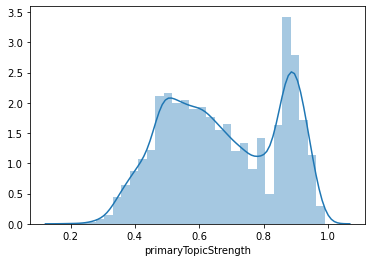

In [382]:
# distribution of primary topic strengths
sns.distplot(electronics['primaryTopicStrength']);

In [383]:
# 1501 / 13995 reviews have a primary topic strength over 90%
len(electronics[electronics['primaryTopicStrength'] > .9])

1501

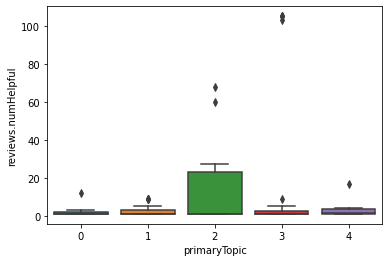

In [394]:
# from those strong topics...
df_slice = electronics[electronics['primaryTopicStrength'] > .9]

# view distribution of non-zero numHelpful counts
sns.boxplot(x='primaryTopic', y='reviews.numHelpful', 
            data=df_slice[(df_slice['reviews.numHelpful'] > 0)]
           );

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling